<a href="https://colab.research.google.com/github/sc21jr-fouritchhorse/comp2721Aug/blob/main/COMP2721Rev030823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
import networkx as nx
import numpy as np
from   matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import random
import heapq

In [236]:
def jrcs_bfs(G):
  visited = []
  Q = []
  T = nx.Graph()
  s = ""
  visited = {}
  for v in list(G.nodes):
    visited[v] = False
  Q.append(0)
  T.add_node(0)
  visited[0] = True
  while(len(Q) > 0):
    print(Q)
    u = Q.pop()
    s += "{}, ".format(u)
    for v in list(G.adj[u]):
      if(visited[v] == False):
        visited[v] = True
        Q.append(v)
        T.add_node(v)
        T.add_edge(u, v)
  print("BFS ordering\n" + s + "\n")
  return T


In [237]:
def jrcs_dfs_simplified(G):
  T = nx.Graph()
  T.add_nodes_from(G)
  V = set(list(G.nodes))
  visited = set()
  _sigma = []
  i = 0
  while (len(V.difference(visited)) > 0):
    v = list(V.difference(visited)).pop()
    if v not in visited:
      _sigma.insert(i,v)
    T, _sigma, visited, i \
    = jrcs_dfs_visit(G, v, T, _sigma, visited, i)


  print("DFS ordering\n" + str(_sigma).strip('[').strip(']') + '\n')
  return T

def jrcs_dfs_visit(G, v, F, sigma, visited, i):
  visited.add(v)
  sigma.insert(i, v)
  i += 1
  for w in G.adj[v]:
    if w not in visited:
      F.add_edge(v, w)
      F, sigma, visited, i \
      = jrcs_dfs_visit(G, w, F, sigma, visited, i)
  return F, sigma, visited, i


In [238]:
#input G has to be an undirected, weighted
#graph where all rates are rational numbers
#larger than 0
def jrcs_prim(G):
  pri_queue = list(G.edges)
  heapq.heapify(pri_queue)
  visited = []

  s = random.choice(list(G.nodes))

  T = nx.Graph()
  T.add_node(s)
  visited.append(s)

  while len(pri_queue) > 0:
    u = visited[-1]    
    for v in G.adj[u]:  
      if v in visited:
        continue
      for e in G.edges[u, v]:
        heapq.heappop(pri_queue, e)
        T.add_edge(e)
        visited.append[v]
        
  return T

In [239]:
#input G has to be an undirected, weighted
#graph where all rates are rational numbers
#larger than 0
def jrcs_kruskal(G):
    T = nx.Graph()
    T.add_nodes_from(G)
    weight_list = sorted(list(G.edges), key= lambda edge : edge[2])

    return T

In [240]:
def gen_MST_test():
    edge_weights = {}
    G = nx.random_geometric_graph(8, 5)
    for e in G.edges:
        edge_weights[e] = random.randrange(1, 100)
    nx.set_edge_attributes(G, values=edge_weights, name="weight")
    return G 

[0]
[2, 3, 4, 24]
[2, 3, 4, 20, 21, 22, 23]
[2, 3, 4, 20, 21, 22]
[2, 3, 4, 20, 21]
[2, 3, 4, 20]
[2, 3, 4, 19]
[2, 3, 4, 15, 16, 17, 18]
[2, 3, 4, 15, 16, 17]
[2, 3, 4, 15, 16]
[2, 3, 4, 15]
[2, 3, 4, 14]
[2, 3, 4, 10, 11, 12, 13]
[2, 3, 4, 10, 11, 12]
[2, 3, 4, 10, 11]
[2, 3, 4, 10]
[2, 3, 4, 9]
[2, 3, 4, 5, 6, 7, 8]
[2, 3, 4, 5, 6, 7]
[2, 3, 4, 5, 6]
[2, 3, 4, 5]
[2, 3, 4]
[2, 3, 1]
[2, 3]
[2]
BFS ordering
0, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 1, 3, 2, 


DFS ordering
24, 20, 22, 21, 23, 19, 15, 17, 16, 18, 14, 10, 12, 11, 13, 9, 5, 7, 6, 8, 4, 0, 2, 1, 3, 24




AttributeError: 'Graph' object has no attribute 'get_edge'

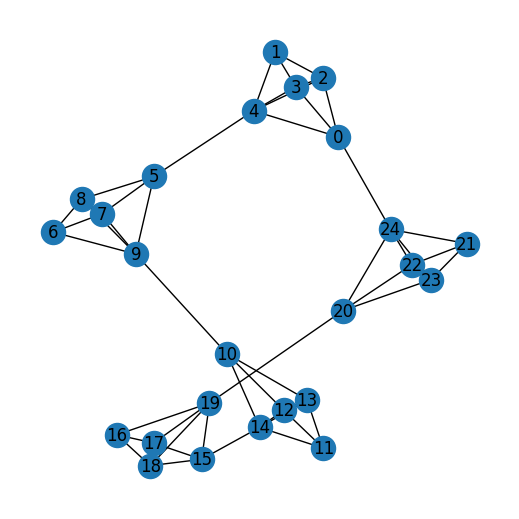

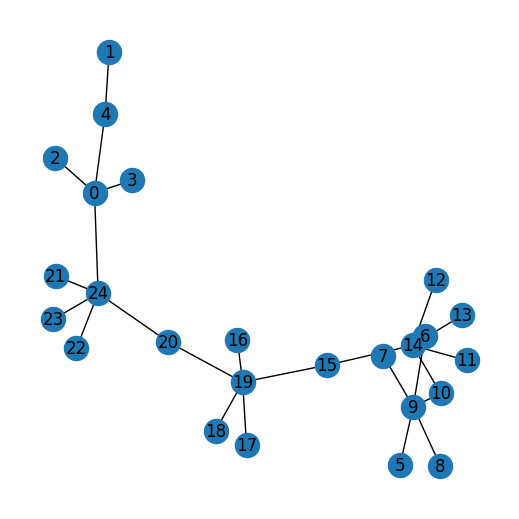

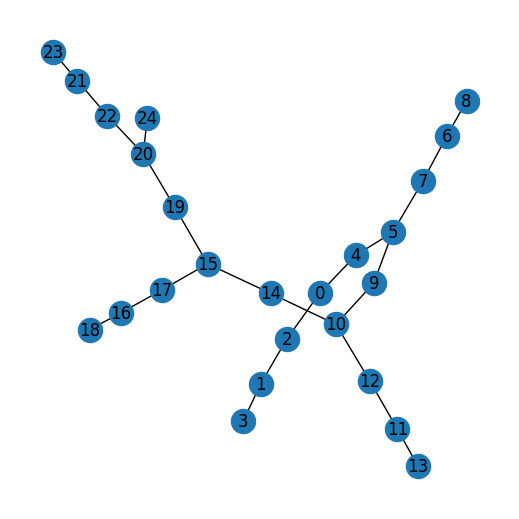

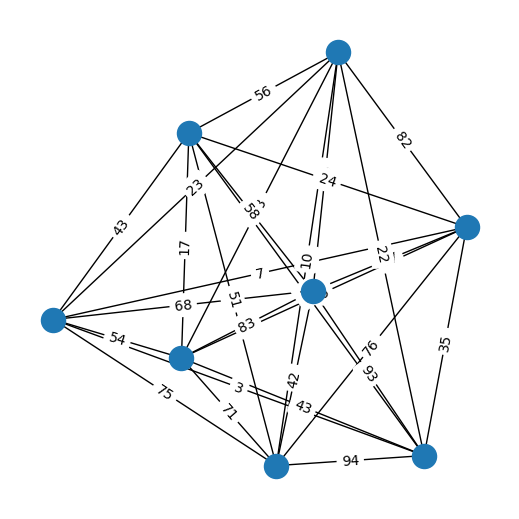

<Figure size 500x500 with 0 Axes>

In [241]:
example = nx.connected_caveman_graph(5, 5)
my_fig0 = plt.figure(figsize=(5,5))
nx.draw(example, with_labels=True)

#test searches
my_fig1 = plt.figure(figsize=(5,5))
nx.draw_spring(jrcs_bfs(example), with_labels=True)
print()
my_fig2 = plt.figure(figsize=(5, 5))
nx.draw_spring(jrcs_dfs_simplified(example), with_labels=True)
print()


example = gen_MST_test()
my_fig3 = plt.figure(figsize=(5,5))
pos = nx.spring_layout(example)
nx.draw(example, pos=pos)
nx.draw_networkx_edge_labels(example, pos, \
                             edge_labels=nx.get_edge_attributes(example, "weight"))
#Test MST algs
my_fig4 = plt.figure(figsize=(5,5))
nx.draw_spring(jrcs_prim(example))
